# ADVANCED CLASSIFICATION MODEL EVALUATION

## AGENDA

- Null accuracy, handling missing values
- Confusion matrix, sensitivity, specificity, setting a threshold
- Handling categorical features, interpreting logistic regression coefficients
- Receiving Operating Characteristic (ROC) curves, Area Under Curve (AUC)

## PART 1: NULL ACCURACY, HANDLING MISSING VALUES

### TITANIC CASE STUDY OVERVIEW

- https://www.kaggle.com/c/titanic/data
- http://trevorstephens.com/post/72916401642/titanic-getting-started-with-r

#### READ THE DATA FROM TITANIC.CSV INTO A DATAFRAME

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 11)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
549 / 891

0.6161616161616161

In [7]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### DEFINE Pclass/Parch AS THE FEATURES AND SURVIVED AS THE RESPONSE

In [8]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

#### SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
print (titanic.shape)
print (X_train.shape)
print (X_test.shape)

(891, 11)
(668, 2)
(223, 2)


#### FIT A LOGISTIC REGRESSION MODEL

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

#### MAKE PREDICTION ON TESTING SET AND CALCULATE ACCURACY

In [12]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.6681614349775785


### WHAT IS NULL ACCURACY? 

**Null accuracy** is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [13]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
y_test.shape

(223,)

In [15]:
import numpy as np
np.where(y_test == 1)

(array([  0,   2,   4,   7,   9,  11,  13,  14,  15,  19,  22,  25,  26,
         27,  29,  31,  35,  36,  38,  40,  41,  42,  44,  48,  51,  54,
         55,  63,  64,  65,  66,  67,  76,  79,  80,  84,  89,  93,  97,
        102, 104, 110, 113, 118, 119, 120, 124, 125, 126, 127, 129, 131,
        132, 133, 134, 135, 136, 139, 142, 144, 150, 153, 154, 158, 162,
        163, 165, 166, 167, 170, 172, 174, 178, 179, 180, 181, 183, 184,
        187, 189, 192, 193, 195, 197, 201, 204, 205, 206, 208, 210, 214,
        217, 218, 220, 222]),)

In [16]:
y_test

PassengerId
863    1
224    0
85     1
681    0
536    1
      ..
507    1
468    0
741    1
355    0
450    1
Name: Survived, Length: 223, dtype: int64

In [17]:
survived = np.where(y_test == 1)
print (survived)
len(survived[0])

(array([  0,   2,   4,   7,   9,  11,  13,  14,  15,  19,  22,  25,  26,
        27,  29,  31,  35,  36,  38,  40,  41,  42,  44,  48,  51,  54,
        55,  63,  64,  65,  66,  67,  76,  79,  80,  84,  89,  93,  97,
       102, 104, 110, 113, 118, 119, 120, 124, 125, 126, 127, 129, 131,
       132, 133, 134, 135, 136, 139, 142, 144, 150, 153, 154, 158, 162,
       163, 165, 166, 167, 170, 172, 174, 178, 179, 180, 181, 183, 184,
       187, 189, 192, 193, 195, 197, 201, 204, 205, 206, 208, 210, 214,
       217, 218, 220, 222]),)


95

In [18]:
y_test.mean()

0.4260089686098655

In [19]:
# compute null accuracy manually
print (y_test.mean())
print (1 - y_test.mean())

0.4260089686098655
0.5739910313901345


In [20]:
# equivalent function in scikit-learn
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

0.5739910313901345


## PART 2: DATA IMPUTATION

### HANDLING MISSING VALUES

* scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

* One possible strategy is to just **DROP MISSING VALUES**

In [21]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# what is the shape of titanic dataset if na's are dropped? Exploring only and not inplace dropping. 
# 183 will be remaining rows
titanic.dropna().shape

(183, 11)

In [23]:
titanic.shape

(891, 11)

In [24]:
titanic[titanic.Age.isnull()].shape

(177, 11)

In [25]:
# what is the shape of titanic dataset where Age is not missing?
titanic[titanic.Age.notnull()].shape

(714, 11)

#### Fill in the missing values i.e., **IMPUTE MISSING VALUES**:

In [26]:
# fill missing values for Age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [27]:
titanic[titanic.Age.isnull()].shape

(0, 11)

In [33]:
# equivalent function in scikit-learn, supports mean/median/most_frequent
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
titanic['Age'] = imp.fit_transform([titanic.Age]).T

In [35]:
titanic['Age'].sample(20)

PassengerId
73     21.000000
91     29.000000
169    29.699118
643     2.000000
839    32.000000
32     29.699118
116    21.000000
574    29.699118
224    29.699118
778     5.000000
573    36.000000
718    27.000000
68     19.000000
423    29.000000
44      3.000000
882    33.000000
222    27.000000
149    36.500000
509    28.000000
739    29.699118
Name: Age, dtype: float64

In [36]:
titanic.sample(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S


In [38]:
# Look up the help
SimpleImputer?

In [39]:
# include Age as a feature
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.672645739910314


## PART 3: CONFUSION MATRIX
-- Follow the lecture slides

In [40]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[107,  21],
       [ 52,  43]])

In [41]:
# calculate the sensitivity
43 / float(52 + 43)

0.45263157894736844

In [42]:
# calculate the specificity
107 / float(107 + 21)

0.8359375

In [43]:
y_test.shape

(223,)

In [44]:
pd.crosstab(y_test, y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107,21,128
1,52,43,95
All,159,64,223


This allows us to see that:

- The diagonal elements show the number of correct classifications for each class: 0, and 1.
- The off-diagonal elements provides the misclassifications: for example, 21 and 52. 
- The total number of classifications for each class in both y_test and y_pred_class from the "All" subtotals

In [45]:
logreg.predict_proba(X_test)

array([[0.47498264, 0.52501736],
       [0.80898057, 0.19101943],
       [0.47270668, 0.52729332],
       [0.80898057, 0.19101943],
       [0.27270744, 0.72729256],
       [0.75629859, 0.24370141],
       [0.51834263, 0.48165737],
       [0.36244351, 0.63755649],
       [0.30683564, 0.69316436],
       [0.80898057, 0.19101943],
       [0.78167476, 0.21832524],
       [0.78771271, 0.21228729],
       [0.52854081, 0.47145919],
       [0.58530402, 0.41469598],
       [0.80898057, 0.19101943],
       [0.30683564, 0.69316436],
       [0.55603983, 0.44396017],
       [0.77551401, 0.22448599],
       [0.84138826, 0.15861174],
       [0.34740377, 0.65259623],
       [0.82136654, 0.17863346],
       [0.78771271, 0.21228729],
       [0.27729578, 0.72270422],
       [0.48162283, 0.51837717],
       [0.71098688, 0.28901312],
       [0.79362777, 0.20637223],
       [0.17088303, 0.82911697],
       [0.68658899, 0.31341101],
       [0.55289606, 0.44710394],
       [0.26320132, 0.73679868],
       [0.

In [46]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [47]:
y_pred_prob

array([0.52501736, 0.19101943, 0.52729332, 0.19101943, 0.72729256,
       0.24370141, 0.48165737, 0.63755649, 0.69316436, 0.19101943,
       0.21832524, 0.21228729, 0.47145919, 0.41469598, 0.19101943,
       0.69316436, 0.44396017, 0.22448599, 0.15861174, 0.65259623,
       0.17863346, 0.21228729, 0.72270422, 0.51837717, 0.28901312,
       0.20637223, 0.82911697, 0.31341101, 0.44710394, 0.73679868,
       0.2371746 , 0.68009932, 0.37984691, 0.21832524, 0.13830687,
       0.48840093, 0.62925782, 0.19101943, 0.71548511, 0.25034889,
       0.20637223, 0.3030773 , 0.59700862, 0.54723456, 0.76770007,
       0.1634398 , 0.43515596, 0.33693117, 0.63755649, 0.53619209,
       0.41469598, 0.49158118, 0.5094493 , 0.36128763, 0.19491046,
       0.22448599, 0.42077343, 0.4098784 , 0.37984691, 0.25034889,
       0.28309652, 0.19101943, 0.49331642, 0.55165835, 0.70071292,
       0.28819497, 0.30161289, 0.21228729, 0.45108012, 0.36289122,
       0.22448599, 0.3486023 , 0.54280329, 0.19101943, 0.21076

Text(0, 0.5, 'Frequency')

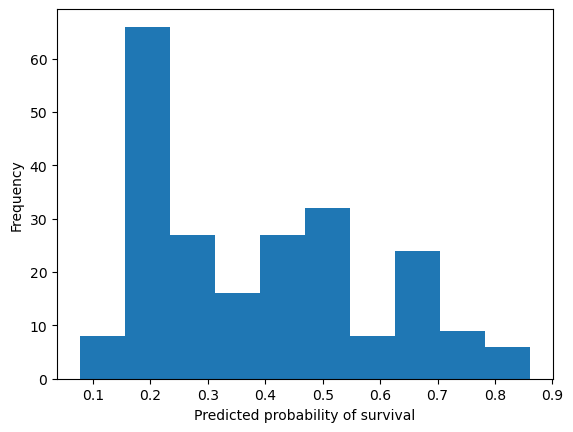

In [48]:
# plot the predicted probabilities
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [49]:
# change the threshold for predicting survived to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [51]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
#y_pred_class = binarize(y_pred_prob, 0.25)
y_pred_class = binarize(y_pred_prob.reshape(1, -1), threshold=0.25)

In [52]:
# new confusion matrix. Columns=Predicted NO, YES; Row=Actual NO, YES. 
# sensitivity = True Positive / Actual YES
# specificity = True Negative / Actual NO
print (metrics.confusion_matrix(y_test[0:], y_pred_class[0]))

[[57 71]
 [27 68]]


In [53]:
# new sensitivity
print (68 / float(27 + 68))

0.7157894736842105


In [54]:
# new specificity
print (57 / float(57 + 71))

0.4453125


In [55]:
metrics.roc_auc_score(y_test[0:], y_pred_class[0], average='macro', sample_weight=None)
# this is the area under the curve. 

0.5805509868421053

In [56]:
pd.crosstab(y_test[0:], y_pred_class[0], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,57,71,128
1,27,68,95
All,84,139,223


## PRECISION RECALL TRADEOFF
### Little bit of Python Code

In [57]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test[0:], y_pred_class[0]).ravel()

In [58]:
# Precision = Positive Predictive Value = TP / (TP + FP)
float(tp) / float(tp + fp)

0.4892086330935252

In [59]:
metrics.precision_score(y_test[0:], y_pred_class[0])

0.4892086330935252

In [60]:
# Recall = TP / P = TP / (TP + FN)
float(tp) / float(tp + fn)

0.7157894736842105

In [61]:
metrics.recall_score(y_test[0:], y_pred_class[0])

0.7157894736842105

In [62]:
# BUILT OFF OF - https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
logreg2 = LogisticRegression(C= 0.01, penalty='l1')
logreg2.fit(X_train, y_train)
y_pred_proba2 = logreg2.predict_proba(X_test)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba2[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1]) / float((cnf_matrix[1,0] + cnf_matrix[1,1])))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

<Axes: >

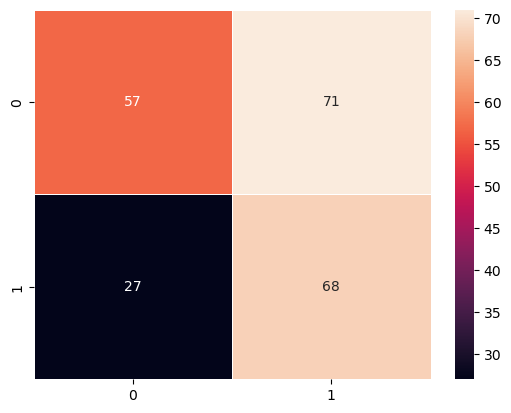

In [64]:
import seaborn as sns
conf = metrics.confusion_matrix(y_test[0:], y_pred_class[0])
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

## PART 4: HANDLING CATEGORICAL FEATURES

### scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding

**Pclass** is an ordered categorical feature, and is already encoded as 1/2/3, so we leave it as-is.

**Sex** is an unordered categorical feature, and needs to be dummy encoded.

### DUMMY ENCODING WITH TWO LEVELS

In [65]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [66]:
# include Sex_Female in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [67]:
#### Logistic regression coefficients
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.2211914695320298,
 'Parch': -0.11742918261504447,
 'Age': -0.040493390262798,
 'Sex_Female': 2.6819925938339053}

# $$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4$$

In [68]:
# convert log-odds to odds
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'Pclass': 0.29487861864630727,
 'Parch': 0.8892034805819657,
 'Age': 0.9603155119236004,
 'Sex_Female': 14.614184436637581}

In [69]:
### example of reshaping a list of items
resh = np.array([1, 0, 29, 0])
resh.reshape(1, -1)

array([[ 1,  0, 29,  0]])

In [70]:
test_data = [[ 1,  0, 29,  0]]
logreg.predict_proba(test_data)[:, 1]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.50362954])

In [71]:
# Predict probability of survival for **Adam**: first class, no parents or kids, 29 years old, male.
test_data = np.array([1, 0, 29, 0])
test_data = test_data.reshape(1, -1)
logreg.predict_proba(test_data)[:, 1]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.50362954])

### PART 5: COEFFICIENT INTERPRETATION

#### INTERPRETING THE Pclass COEFFICIENT

In [72]:
# Predict probability of survival for **Bill**: same as Adam, except second class.
test_data = [[2, 0, 29, 0]]
logreg.predict_proba(test_data)[:, 1]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.23029024])

#### How could we have calculated that change ourselves using the coefficients?

# $$odds = \frac {probability} {1 - probability}$$
# $$probability = \frac {odds} {1 + odds}$$

In [73]:
# convert Adam's probability to odds
adamodds = 0.5/(1 - 0.5)

In [74]:
adamodds

1.0

In [75]:
# adjust odds for Bill due to lower class
billodds = adamodds * 0.295

In [76]:
billodds

0.295

#### INTERPRETING THE SEX_FEMALE COEFFICIENT

In [77]:
# Predict probability of survival for **Susan**: same as Adam, except female.
test_data = [[1, 0, 29, 1]]
logreg.predict_proba(test_data)[:, 1]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.93682045])

#### Let's calculate that change ourselves:

In [78]:
# adjust odds for Susan due to her sex
susanodds = adamodds * 14.6
susanodds

14.6

#### How do we interpret the **Sex_Female coefficient**? 
For a given Pclass/Parch/Age, being female is associated with an increase in the **log-odds of survival** by 2.68 (or an increase in the **odds of survival** by 14.6) as compared to a male, which is called the **baseline level**.

#### WHAT IF WE HAD REVERSED THE ENCODING FOR SEX?

In [79]:
# encode Sex_Male feature
titanic['Sex_Male'] = titanic.Sex.map({'male':1, 'female':0})

In [80]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Sex_Male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [81]:
# include Sex_Male in the model instead of Sex_Female
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Male']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.2211775528177078,
 'Parch': -0.11743516176823539,
 'Age': -0.0404931085556599,
 'Sex_Male': -2.6819732890763257}

* The coefficient is the same, except that it's **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

### PART 6: DUMMY ENCODING WITH MORE THAN TWO LEVELS

#### How do we include an unordered categorical feature with more than two levels, like **Embarked**? 

We can't simply encode it as C=1, Q=2, S=3, because that would imply an **ordered relationship** in which Q is somehow "double" C and S is somehow "triple" C.

Instead, we create **additional dummy variables**:

In [82]:
pd.get_dummies(titanic.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


In [83]:
# create a DataFrame with the two dummy variable columns
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

In [84]:
embarked_dummies

,Embarked_Q,Embarked_S
PassengerId,,
1,False,True
2,False,False
3,False,True
4,False,True
5,False,True
...,...,...
887,False,True
888,False,True
889,False,True


In [85]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Sex_Male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,False,True


In [86]:
# include Embarked_Q and Embarked_S in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
dict(zip(feature_cols, logreg.coef_[0]))

{'Pclass': -1.1908504002674218,
 'Parch': -0.09423587393588204,
 'Age': -0.04084272810305818,
 'Sex_Female': 2.6442482627463852,
 'Embarked_Q': -0.18332181517882368,
 'Embarked_S': -0.6098136101535959}

#### How do we interpret the Embarked coefficients? 

They are **measured against the baseline (C)**, and thus embarking at Q is associated with a decrease in the likelihood of survival compared with C, and embarking at S is associated with a further decrease in the likelihood of survival.

## PART 7: ROC CURVES AND AUC
-- Follow the lecture slides

In [87]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

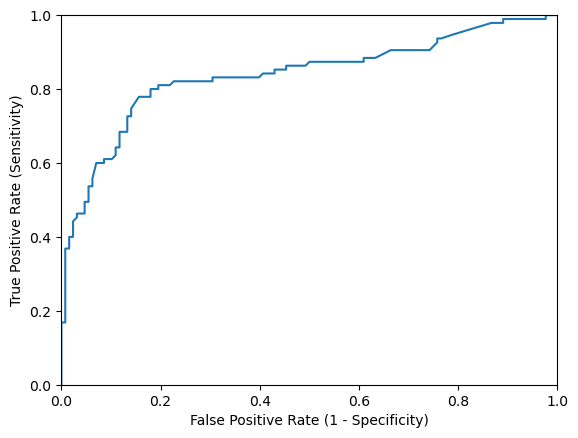

In [88]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

- Besides allowing you to calculate AUC, seeing the ROC curve can help you to choose a threshold that **balances sensitivity and specificity** in a way that makes sense for the particular context.


In [89]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.8379934210526315


* It's important to use **y_pred_prob** and not **y_pred_class** when computing an ROC curve or AUC. If you use y_pred_class, it will not give you an error, rather it will interpret the ones and zeros as predicted probabilities of 100% and 0%, and thus will give you incorrect results:


In [90]:
# calculate AUC using y_pred_class (producing incorrect results)
print (metrics.roc_auc_score(y_test[0:], y_pred_class[0]))

0.5805509868421053
